In [16]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import pickle
with open('octavius_data.pickle', 'rb') as f:
    df = pickle.load(f)

In [11]:
df.head(3)

title           startdate              enddate     sigmaH  \
8  750 MeV rfko 0_035 2023-10-24 09:45:07  2023-10-24 09:48:36  31.372133   
9  750 MeV rfko 0_040 2023-10-24 09:51:55  2023-10-24 09:55:21  33.441092   
7  750 MeV rfko 0_050 2023-10-24 09:57:03  2023-10-24 10:00:37  37.701422   

      sigmaV       muH       muV  sigmaH_err  sigmaV_err  
8        NaN  0.992154       NaN    1.464171         NaN  
9        NaN  0.796437       NaN    1.470618         NaN  
7  83.935322  2.360696 -7.149119    0.905622   13.176883

In [38]:
df = pd.read_csv("data_with_energy_column.csv")
df['startdate'] = pd.to_datetime(df['startdate'], format='%d.%m.%Y %H:%M')
df['enddate'] = pd.to_datetime(df['enddate'], format='%d.%m.%Y %H:%M')
df.head(3)


title           startdate             enddate     sigmaH  \
0  750 MeV rfko 0_035 2023-10-24 09:45:00 2023-10-24 09:48:00  31.372133   
1  750 MeV rfko 0_040 2023-10-24 09:51:00 2023-10-24 09:55:00  33.441092   
2  750 MeV rfko 0_050 2023-10-24 09:57:00 2023-10-24 10:00:00  37.701422   

      sigmaV       muH       muV  sigmaH_err  sigmaV_err  energy  rfko_gain  \
0        NaN  0.992154       NaN    1.464171         NaN    0.75      0.035   
1        NaN  0.796437       NaN    1.470618         NaN    0.75      0.040   
2  83.935322  2.360696 -7.149119    0.905622   13.176883    0.75      0.050   

   collimator  
0         NaN  
1         NaN  
2         NaN

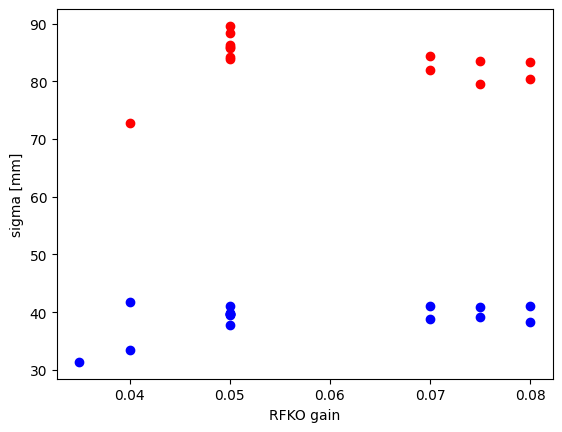

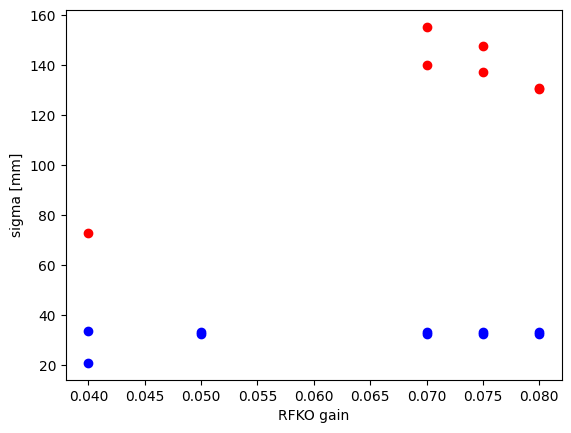

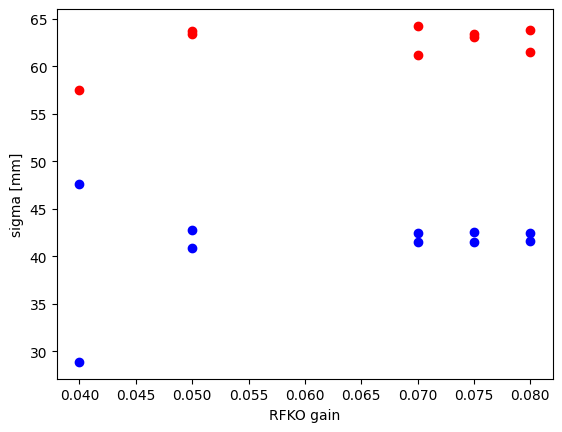

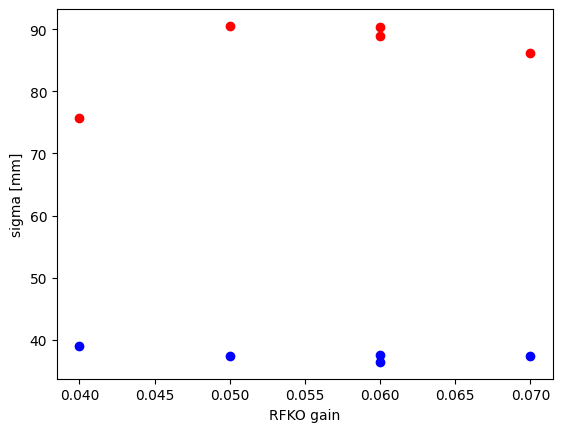

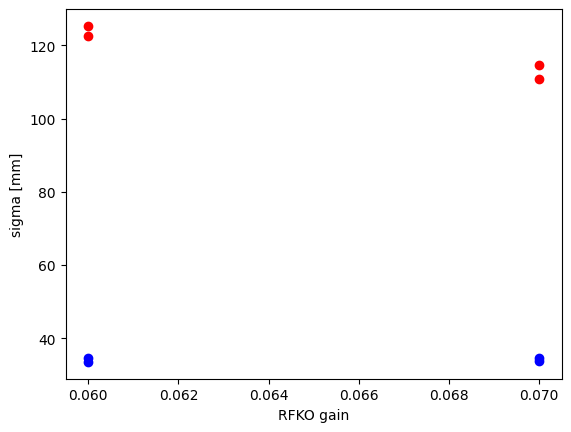

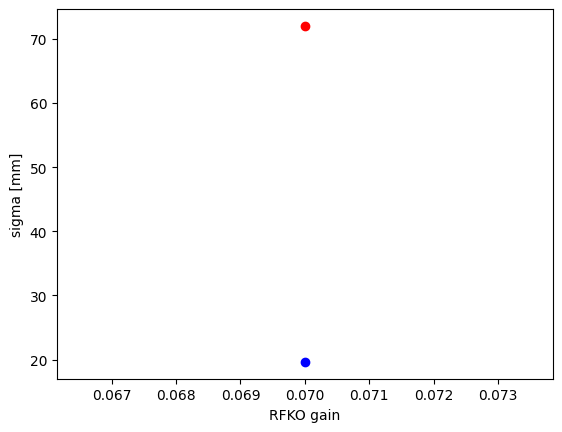

In [39]:
df['startdate'] = pd.to_datetime(df['startdate'], format='%d.%m.%Y %H:%M')

for energy in df.energy.unique():

    sub_df = df[(df.energy == energy) & (df.startdate < pd.Timestamp('2023-10-25'))]

    fig, ax = plt.subplots()
    ax.scatter(sub_df.rfko_gain, sub_df.sigmaH, marker="o", c="b")
    ax.scatter(sub_df.rfko_gain, sub_df.sigmaV, marker="o", c="r")

    ax.set_xlabel("RFKO gain")
    ax.set_ylabel("sigma [mm]")

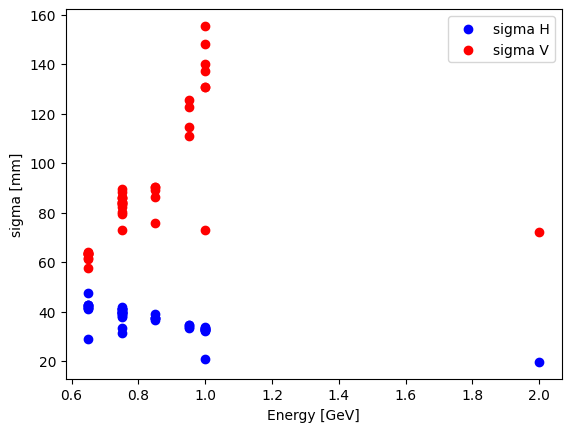

In [42]:
df['startdate'] = pd.to_datetime(df['startdate'], format='%d.%m.%Y %H:%M')

sub_df = df[ (df.startdate < pd.Timestamp('2023-10-25'))]

fig, ax = plt.subplots()
ax.scatter(sub_df.energy, sub_df.sigmaH, marker="o", c="b", label="sigma H")
ax.scatter(sub_df.energy, sub_df.sigmaV, marker="o", c="r", label="sigma V")

ax.set_xlabel("Energy [GeV]")
ax.set_ylabel("sigma [mm]")
ax.legend()